In [72]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 19042)

Matrix products: default

locale:
[1] LC_COLLATE=English_United Kingdom.1252 
[2] LC_CTYPE=English_United Kingdom.1252   
[3] LC_MONETARY=English_United Kingdom.1252
[4] LC_NUMERIC=C                           
[5] LC_TIME=English_United Kingdom.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] lattice_0.20-38 languageR_1.5.0 lmerTest_3.1-0  lme4_1.1-26    
[5] Matrix_1.2-17   readxl_1.3.1   

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.6        cellranger_1.1.0  compiler_3.6.1    pillar_1.6.1     
 [5] nloptr_1.2.2.2    plyr_1.8.4        base64enc_0.1-3   tools_3.6.1      
 [9] boot_1.3-20       digest_0.6.18     uuid_0.1-2        statmod_1.4.36   
[13] jsonlite_1.6      evaluate_0.13     tibble_3.1.1      lifecycle_1.0.0  
[17] nlme_3.1-139      gtable_0.3.0      pkgconfi

In [1]:
library(readxl)
library(lme4)
library(lmerTest)
library(languageR)
library(lattice)

Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'lme4' was built under R version 3.6.3"Loading required package: Matrix
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'lmerTest'

The following object is masked from 'package:lme4':

    lmer

The following object is masked from 'package:stats':

    step

Warning message:
"package 'languageR' was built under R version 3.6.3"

In [2]:
FFD2 <- read.csv('C:/Users/fm02/OwnCloud/EOS_EyeTrackingDataCollection/Data_Results/data_forR/norm_nrgr_ffd_41.csv')
FFD2 <- FFD2[FFD2$ms != 0, ]

Based on the preceding inspection, exclude participant 3, 12, 14 because less then half of the trials were kept in the analysis (mainly because they rarely fixated the target word on first pass). Exclude also 2 because did a very high number of regressions.

In [49]:
FFD2 <- FFD2[!(FFD2$Subject== 3 | FFD2$Subject== 14 | FFD2$Subject== 33 | FFD2$Subject== 34 ),]



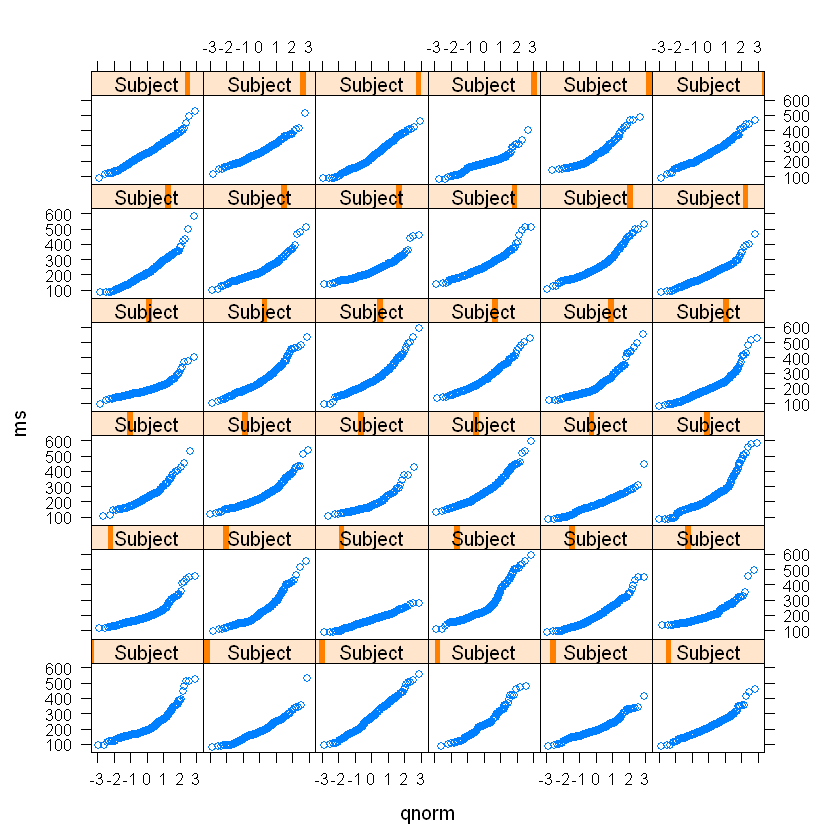

In [117]:
qqmath(~ms|Subject, data=FFD2)

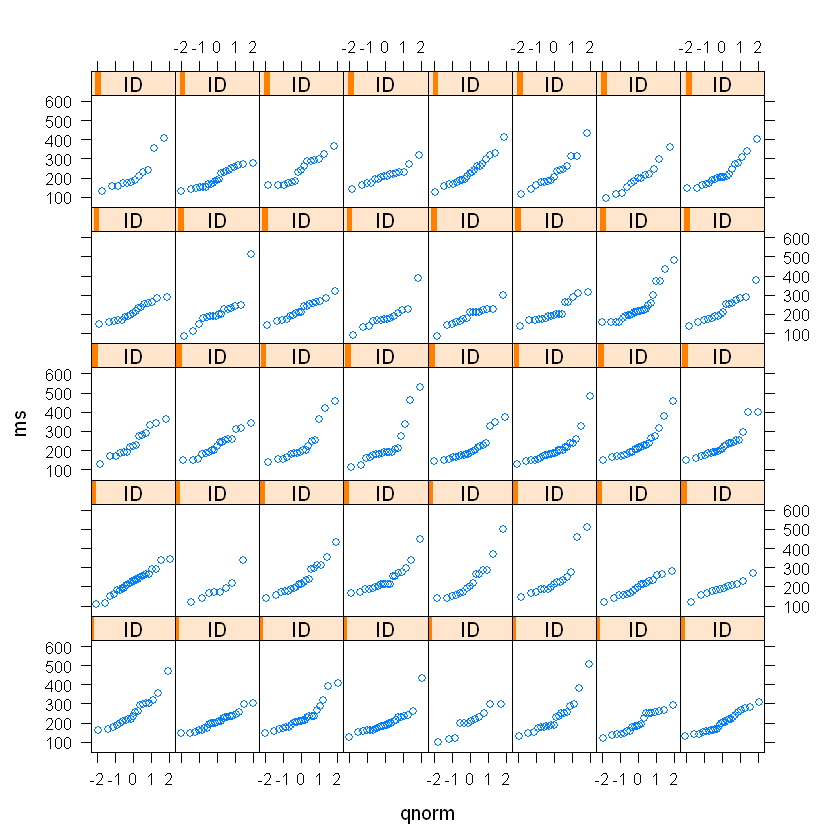

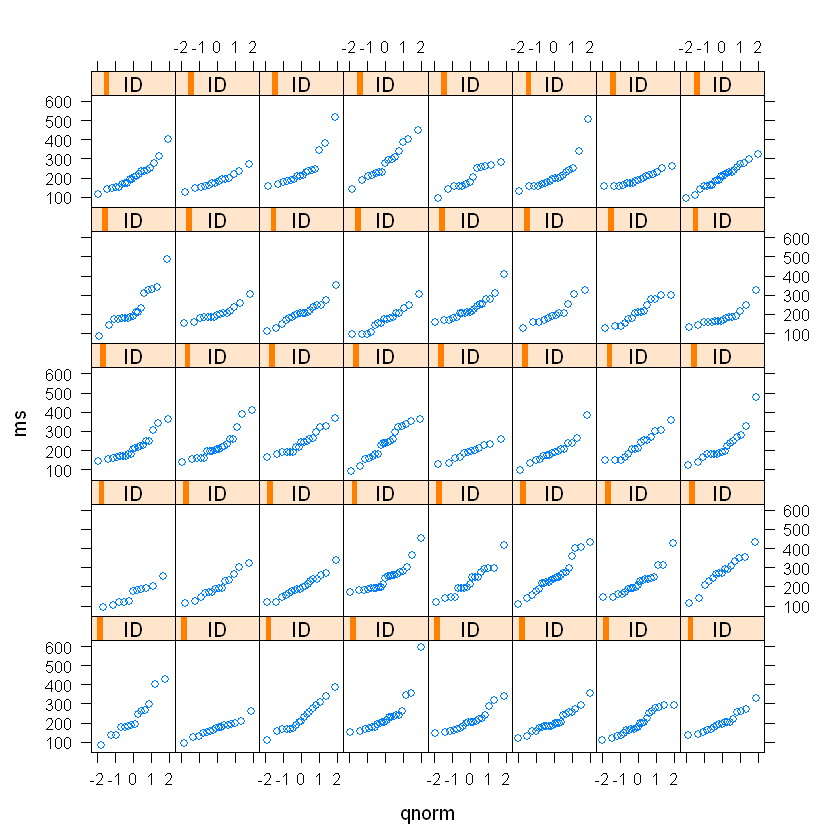

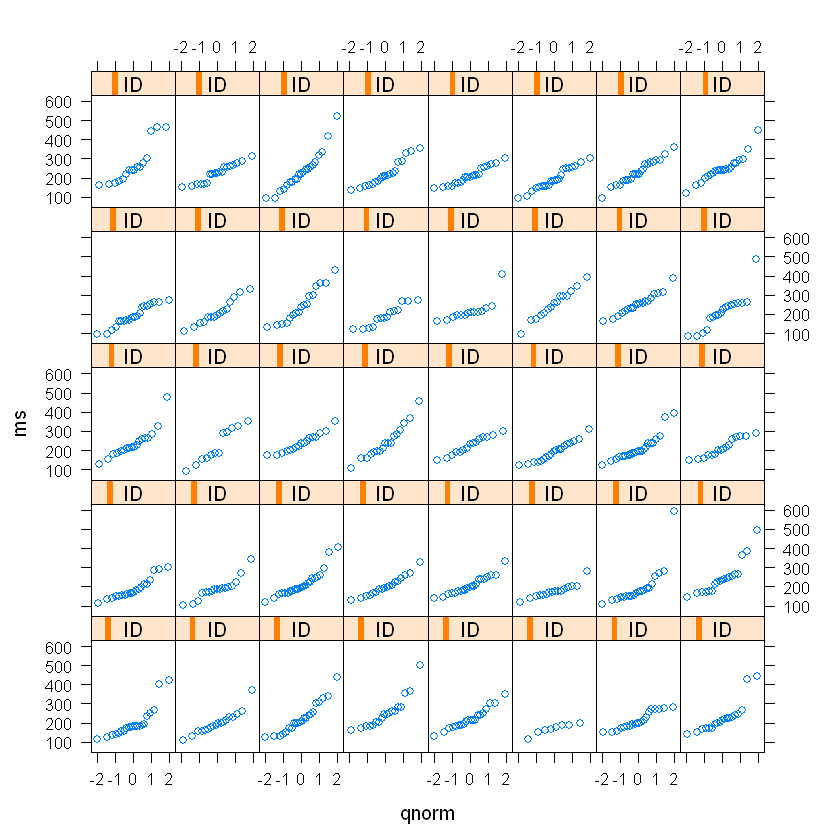

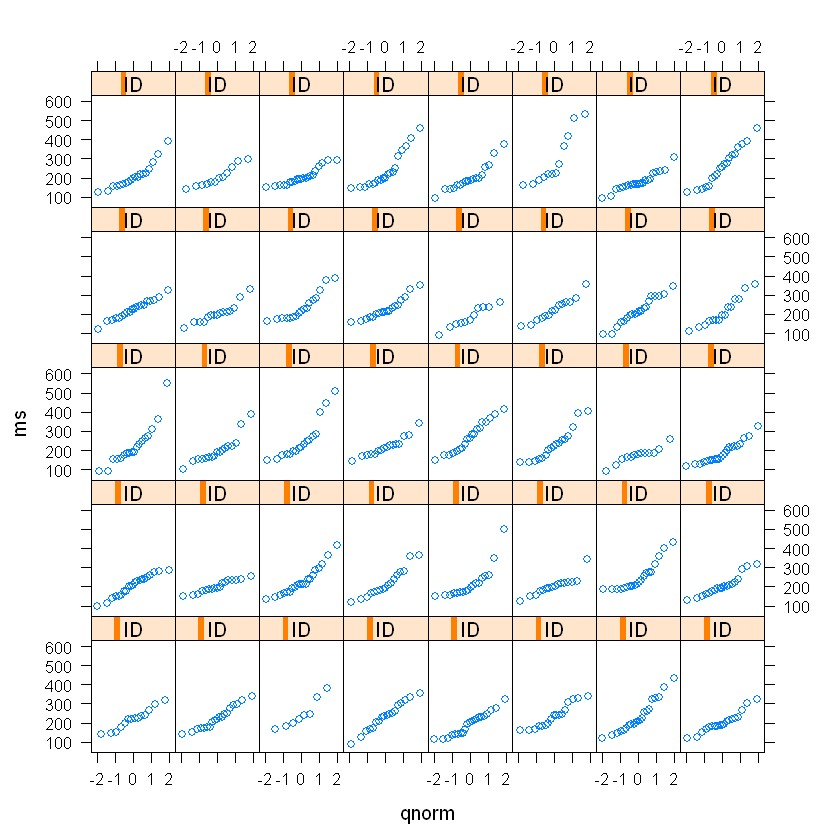

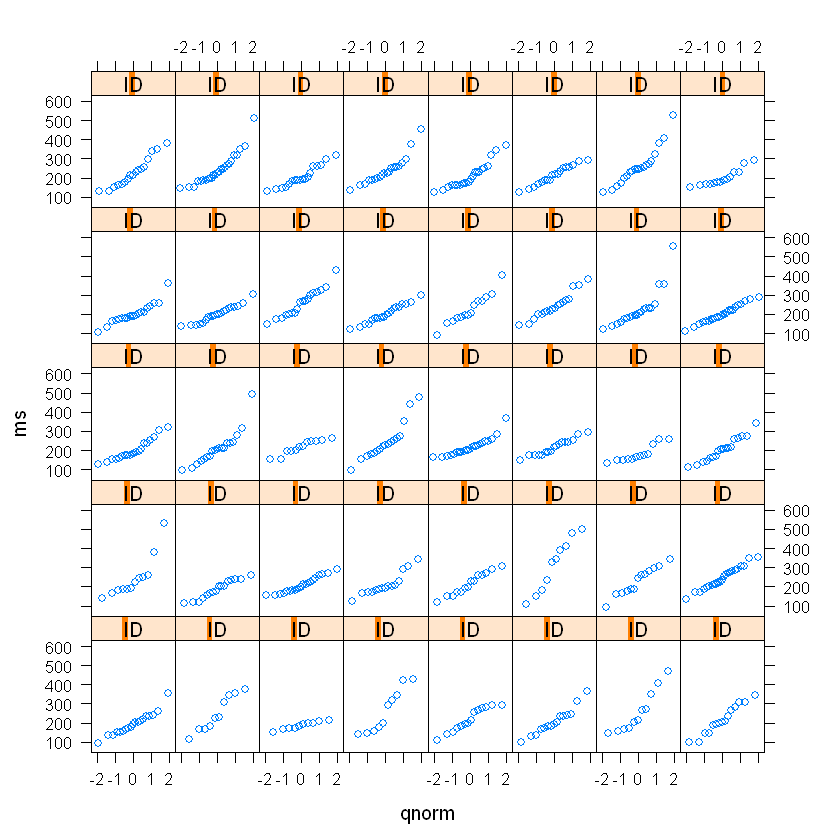

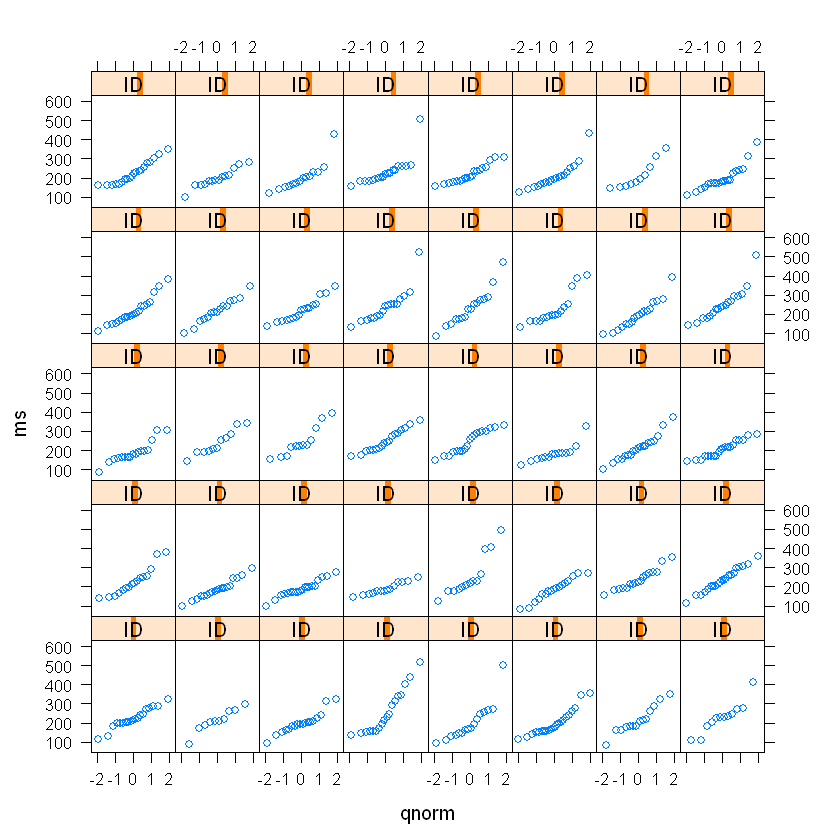

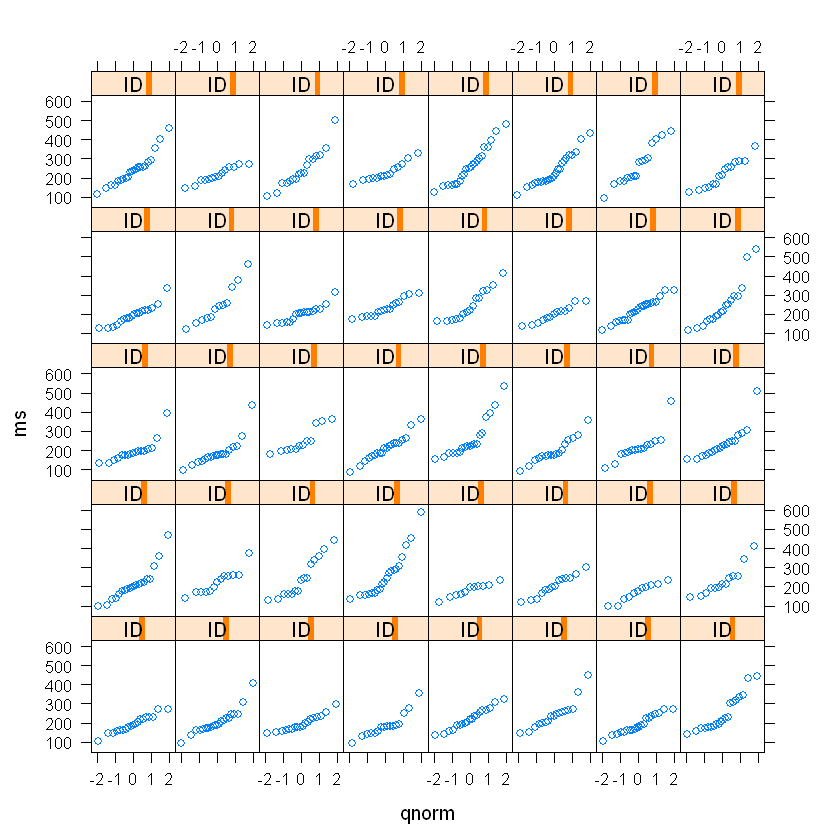

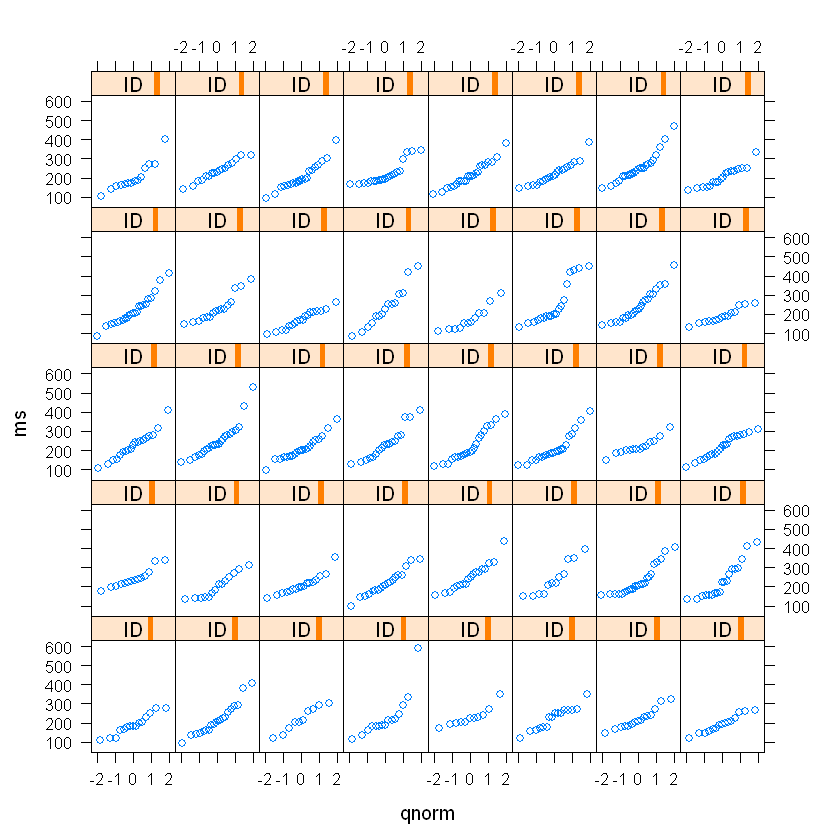

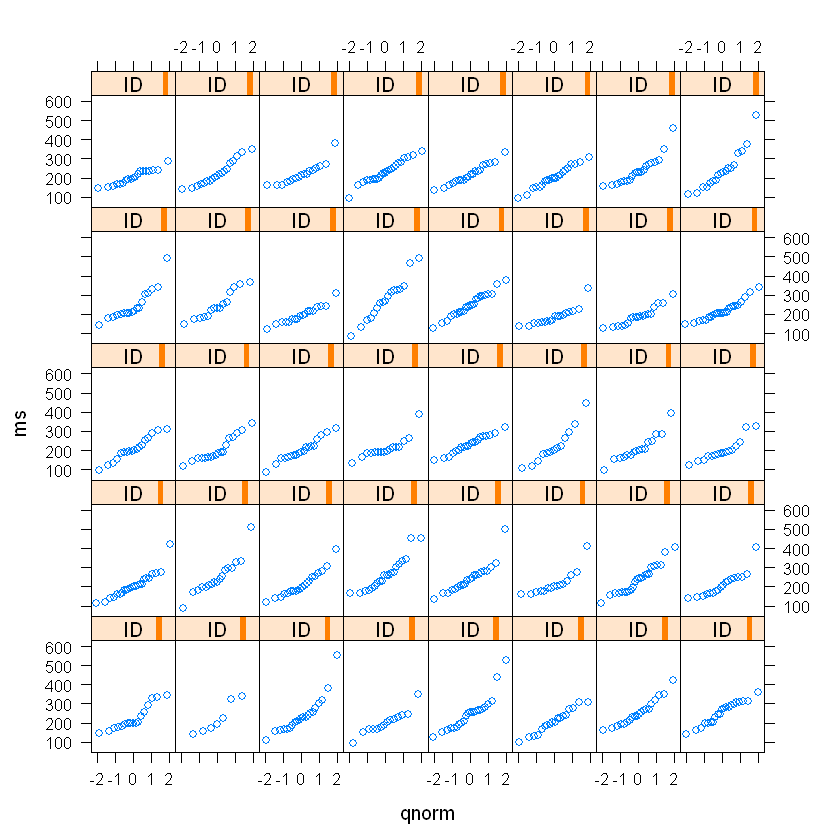

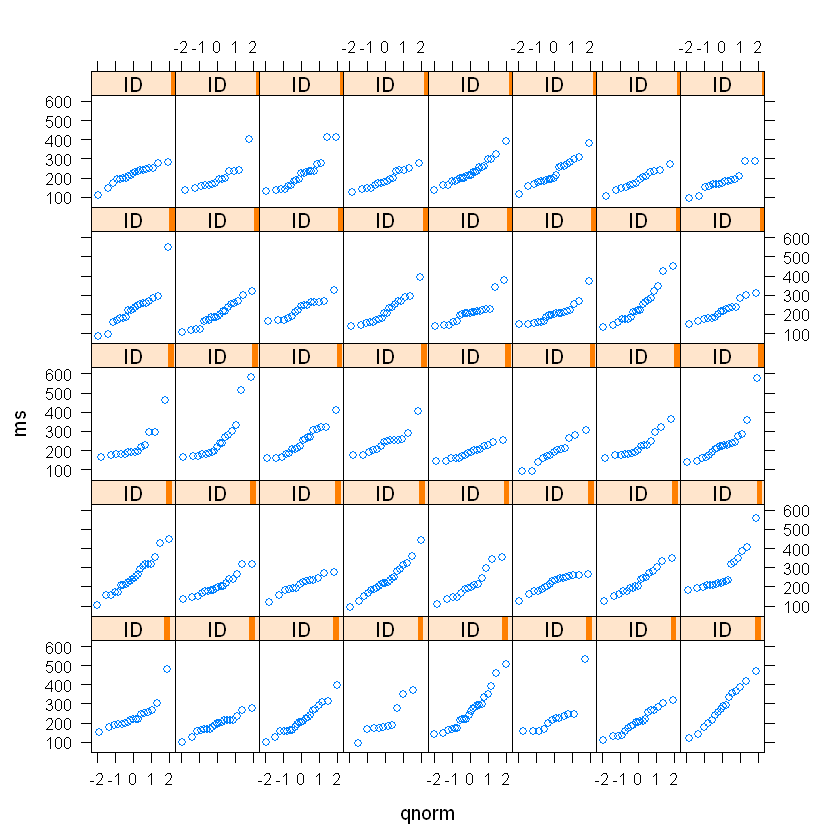

In [13]:
qqmath(~ms|ID, data=FFD2, layout=c(8,5,10))

In [5]:
FFD2_400 <- FFD2[FFD2$ms > 0 & FFD2$ms < 400,]

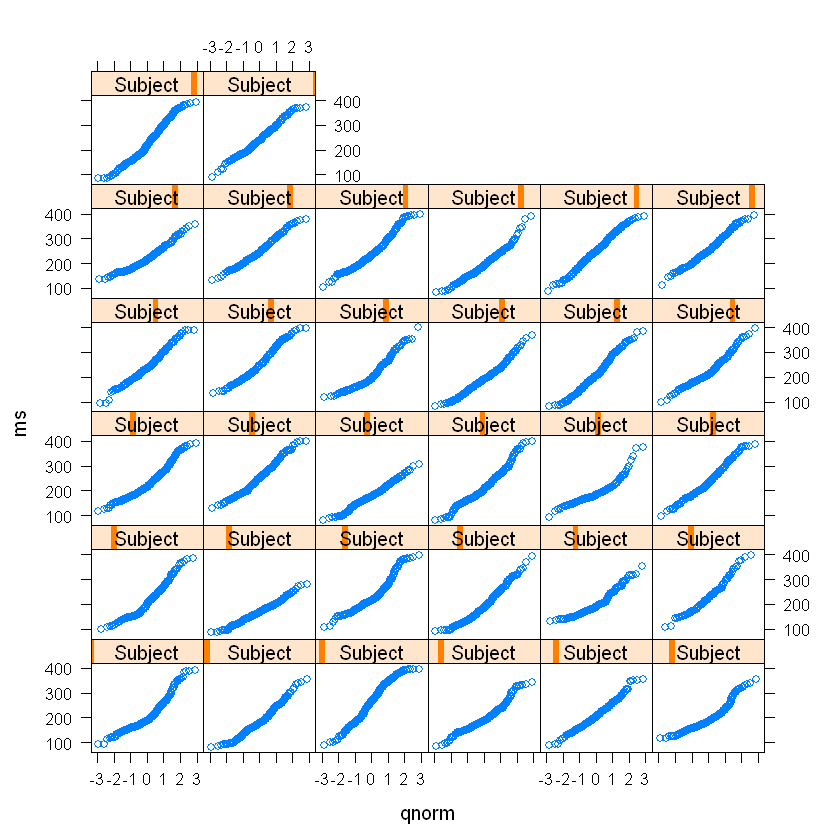

In [6]:
qqmath(~ms|Subject, data=FFD2_400)

Let's start from the analyses including regressions.

In [7]:
colnames(FFD2)

[1] "ms"                    "trialnr"               "time_before_ff"       
 [4] "Word"                  "ID"                    "ConcM"                
 [7] "LEN"                   "UN2_F"                 "UN3_F"                
[10] "Orth"                  "OLD20"                 "FreqCount"            
[13] "LogFreqZipf"           "V_MeanSum"             "A_MeanSum"            
[16] "mink3_SM"              "BLP_rt"                "BLP_accuracy"         
[19] "similarity"            "Position"              "PRECEDING_Frequency"  
[22] "PRECEDING_LogFreqZipf" "LENprec"               "Predictability"       
[25] "cloze"                 "plausibility"          "Sim"                  
[28] "Subject"               "Gender"                "Age"

In [3]:
# let's try some of the predictos influence on fixation durations

############ trial number (in the sense of order) #######

trialsFFD2 = lmer(ms ~ trialnr + (1|ID) + (1|Subject), data = FFD2)
summary(trialsFFD2)
# The order of the trials does not seem to affect FFD, so not including it

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ trialnr + (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 106884.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0202 -0.6423 -0.1468  0.4652  5.5455 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  228.5   15.12   
 Subject  (Intercept)  709.0   26.63   
 Residual             4084.5   63.91   
Number of obs: 9540, groups:  ID, 400; Subject, 40

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)  221.72175    4.48257   47.58632  49.463   <2e-16 ***
trialnr       -0.00201    0.00576 9359.51844  -0.349    0.727    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
        (Intr)
trialnr -0.257

In [4]:
############ log frequency Zipf value #######

freqFFD2 = lmer(ms ~ LogFreqZipf + (1|ID) + (1|Subject), data = FFD2)
summary(freqFFD2)
# LogFreqZipf affects FFD , so including it

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 106860.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0304 -0.6436 -0.1470  0.4693  5.4955 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  216.6   14.72   
 Subject  (Intercept)  709.2   26.63   
 Residual             4084.0   63.91   
Number of obs: 9540, groups:  ID, 400; Subject, 40

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 221.2924     4.3294  41.3908   51.11  < 2e-16 ***
LogFreqZipf  -3.6051     0.9903 395.3352   -3.64 0.000308 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
LogFreqZipf 0.002 

In [5]:
############ length of the word (in the sense of number of characters) #######
LENFFD2 = lmer(ms ~ LEN + (1|ID) + (1|Subject), data = FFD2)
summary(LENFFD2)
# length marginally affects FFD, so including it 

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LEN + (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 106873.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0133 -0.6422 -0.1478  0.4661  5.5544 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  228.4   15.11   
 Subject  (Intercept)  708.7   26.62   
 Residual             4084.3   63.91   
Number of obs: 9540, groups:  ID, 400; Subject, 40

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 221.2807     4.3318  41.5307  51.083   <2e-16 ***
LEN           0.8771     1.0110 403.6804   0.868    0.386    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
    (Intr)
LEN -0.010

In [6]:
############ preceding word logFreq distance #######
precFFD2 = lmer(ms ~ PRECEDING_LogFreqZipf + (1|ID) + (1|Subject), data = FFD2)
summary(precFFD2)
# preceding word logFreq does not seem to affect FFD, so not including it

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ PRECEDING_LogFreqZipf + (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 106868.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0028 -0.6441 -0.1453  0.4661  5.5293 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  223.4   14.95   
 Subject  (Intercept)  707.9   26.61   
 Residual             4084.3   63.91   
Number of obs: 9540, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           221.2959     4.3276  41.4684  51.136   <2e-16 ***
PRECEDING_LogFreqZipf  -2.4069     0.9972 393.4541  -2.414   0.0163 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
PRECEDING_L 0.002 

In [7]:
############ position in the sentence #######
posFFD2 = lmer(ms ~  Position + (1|ID) + (1|Subject), data = FFD2)
summary(posFFD2)
# Position in the sentence does not seem to affect FFD, so not including it

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ Position + (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 106869.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0599 -0.6446 -0.1488  0.4649  5.5691 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  224.9   15.00   
 Subject  (Intercept)  708.9   26.62   
 Residual             4084.2   63.91   
Number of obs: 9540, groups:  ID, 400; Subject, 40

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  221.349      4.331  41.484   51.11   <2e-16 ***
Position       2.112      1.006 403.702    2.10   0.0364 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
Position 0.003 

In [9]:
######## this is our basic model ###########
lmeBasic = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + (1|ID) + (1|Subject), data = FFD2)
summary(lmeBasic)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + (1 | ID) +  
    (1 | Subject)
   Data: FFD2

REML criterion at convergence: 106847.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0451 -0.6444 -0.1454  0.4700  5.5052 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  208.8   14.45   
 Subject  (Intercept)  708.1   26.61   
 Residual             4084.2   63.91   
Number of obs: 9540, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           221.3010     4.3242  41.3079  51.178  < 2e-16 ***
LogFreqZipf            -3.4489     0.9831 392.7058  -3.508 0.000503 ***
PRECEDING_LogFreqZipf  -2.2269     0.9820 391.4753  -2.268 0.023890 *  
Position                2.2138     0.9861 402.1939   2.245 0.025316 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.

In [10]:
################ introduce Predictability(a priori), cloze, and semanticpredictability(=sim) ###############
lmeOnlyPred = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + Predictability +
                     (1|ID) + (1|Subject), data = FFD2)
summary(lmeOnlyPred)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + Predictability +  
    (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 106826.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0716 -0.6421 -0.1475  0.4691  5.4820 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  190.9   13.82   
 Subject  (Intercept)  708.0   26.61   
 Residual             4084.3   63.91   
Number of obs: 9540, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           221.2930     4.3186  41.1125  51.242  < 2e-16 ***
LogFreqZipf            -3.0577     0.9636 390.2457  -3.173  0.00163 ** 
PRECEDING_LogFreqZipf  -2.3139     0.9588 389.5980  -2.413  0.01627 *  
Position                1.9910     0.9643 401.2875   2.065  0.03958 *  
Predictability          4.3083     0.9621

In [11]:
lmeOnlyCloze = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + cloze +
                      (1|ID) + (1|Subject), data = FFD2)
summary(lmeOnlyCloze)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + cloze +  
    (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 106801.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0747 -0.6425 -0.1468  0.4712  5.4980 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  167.8   12.95   
 Subject  (Intercept)  709.2   26.63   
 Residual             4084.8   63.91   
Number of obs: 9540, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           221.2751     4.3154  40.8545  51.276  < 2e-16 ***
LogFreqZipf            -1.9709     0.9532 388.4147  -2.068   0.0393 *  
PRECEDING_LogFreqZipf  -2.1689     0.9276 387.4710  -2.338   0.0199 *  
Position                1.9055     0.9333 399.6665   2.042   0.0418 *  
cloze                  -6.5593     0.9556 395.1802 

In [12]:
lmeOnlySemSim = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position +  Sim +
                       (1|ID) + (1|Subject), data = FFD2)
summary(lmeOnlySemSim)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + Sim + (1 |  
    ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 106801.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0567 -0.6421 -0.1439  0.4673  5.4788 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  169.0   13.00   
 Subject  (Intercept)  708.6   26.62   
 Residual             4084.4   63.91   
Number of obs: 9540, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           221.2794     4.3140  40.8696  51.293  < 2e-16 ***
LogFreqZipf            -2.2514     0.9466 389.2926  -2.378  0.01787 *  
PRECEDING_LogFreqZipf  -2.4699     0.9298 389.2663  -2.657  0.00822 ** 
Position                2.0013     0.9343 401.1610   2.142  0.03279 *  
Sim                    -6.4703     0.9496 397.8057  -

In [13]:
anova(lmeBasic,lmeOnlyPred)
anova(lmeBasic, lmeOnlyCloze)
anova(lmeBasic, lmeOnlySemSim)

# All are significant, but cloze semantic similarity explains the most variance.

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasic,7,106871.7,106921.8,-53428.84,106857.7,NA,NA,NA
lmeOnlyPred,8,106853.9,106911.2,-53418.96,106837.9,19.74694,1,8.840291e-06


refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasic,7,106871.7,106921.8,-53428.84,106857.7,NA,NA,NA
lmeOnlyCloze,8,106828.8,106886.2,-53406.42,106812.8,44.826,1,2.153443e-11


refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasic,7,106871.7,106921.8,-53428.84,106857.7,NA,NA,NA
lmeOnlySemSim,8,106829.4,106886.7,-53406.70,106813.4,44.28201,1,2.843177e-11


In [50]:
################ introduce Concreteness ###############
onlyConc = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + similarity + (1|ID) + (1|Subject), data = FFD2)
summary(onlyConc)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + similarity +  
    (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 106829.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0485 -0.6415 -0.1483  0.4709  5.5110 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  195.7   13.99   
 Subject  (Intercept)  708.0   26.61   
 Residual             4083.7   63.90   
Number of obs: 9540, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           221.2771     4.3201  41.1636  51.221  < 2e-16 ***
LogFreqZipf            -3.5464     0.9663 393.9458  -3.670 0.000276 ***
PRECEDING_LogFreqZipf  -2.4213     0.9661 392.7689  -2.506 0.012604 *  
Position                1.8384     0.9737 403.8866   1.888 0.059746 .  
similarity             -3.9169     0.9778 405.

In [17]:
################ introduce Concreteness ###############
onlyConc = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + ConcM + (1|ID) + (1|Subject), data = FFD2)
summary(onlyConc)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + ConcM +  
    (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 106836.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0095 -0.6427 -0.1483  0.4702  5.4896 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  201.0   14.18   
 Subject  (Intercept)  707.2   26.59   
 Residual             4084.2   63.91   
Number of obs: 9540, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           221.2561     4.3191  41.2256  51.227  < 2e-16 ***
LogFreqZipf            -3.3089     0.9740 391.4043  -3.397  0.00075 ***
PRECEDING_LogFreqZipf  -1.9374     0.9764 389.7760  -1.984  0.04794 *  
Position                2.1842     0.9761 401.3254   2.238  0.02579 *  
ConcM                  -2.9853     0.9792 396.5490 

In [18]:
anova(lmeBasic,onlyConc)


refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasic,7,106871.7,106921.8,-53428.84,106857.7,NA,NA,NA
onlyConc,8,106864.4,106921.7,-53424.19,106848.4,9.282082,1,0.002314062


In [19]:
################# let's check sensorimotor strength
onlySM = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + mink3_SM + (1|ID) + (1|Subject), data = FFD2)
summary(onlySM)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + mink3_SM +  
    (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 106840.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0113 -0.6420 -0.1461  0.4735  5.5064 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  204.8   14.31   
 Subject  (Intercept)  708.7   26.62   
 Residual             4084.3   63.91   
Number of obs: 9540, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           221.2881     4.3246  41.2637  51.170  < 2e-16 ***
LogFreqZipf            -3.1488     0.9871 391.8520  -3.190  0.00154 ** 
PRECEDING_LogFreqZipf  -2.2579     0.9769 390.0094  -2.311  0.02134 *  
Position                2.1950     0.9810 400.7831   2.237  0.02581 *  
mink3_SM               -2.1854     0.9817 388.75

In [52]:
interaction_Conc.Sim = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + cloze*ConcM + (1|ID) + (1|Subject), data = FFD2)
additive_Conc.Sim = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + cloze + ConcM + (1|ID) + (1|Subject), data = FFD2)

summary(interaction_Conc.Sim) 
summary(additive_Conc.Sim) 
anova(interaction_Conc.Sim,additive_Conc.Sim )

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + cloze *  
    ConcM + (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 106793.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0514 -0.6449 -0.1462  0.4705  5.4872 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  165.6   12.87   
 Subject  (Intercept)  708.4   26.62   
 Residual             4084.7   63.91   
Number of obs: 9540, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           221.3253     4.3156  40.9484  51.285  < 2e-16 ***
LogFreqZipf            -1.9986     0.9544 386.4454  -2.094   0.0369 *  
PRECEDING_LogFreqZipf  -1.9238     0.9355 385.2444  -2.056   0.0404 *  
Position                1.8403     0.9376 398.7311   1.963   0.0504 .  
cloze                  -6.1211     0.9882 3

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + cloze +  
    ConcM + (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 106795.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0468 -0.6432 -0.1463  0.4695  5.4840 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  164.8   12.84   
 Subject  (Intercept)  708.5   26.62   
 Residual             4084.8   63.91   
Number of obs: 9540, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           221.2433     4.3123  40.8238  51.305  < 2e-16 ***
LogFreqZipf            -1.9526     0.9490 387.1252  -2.058   0.0403 *  
PRECEDING_LogFreqZipf  -1.9800     0.9278 385.7202  -2.134   0.0335 *  
Position                1.8992     0.9292 398.5091   2.044   0.0416 *  
cloze                  -6.2279     0.9643 3

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
additive_Conc.Sim,9,106826.4,106890.8,-53404.18,106808.4,NA,NA,NA
interaction_Conc.Sim,10,106828.1,106899.7,-53404.06,106808.1,0.2563726,1,0.6126232


In [22]:
confint(additive_Conc.Sim)

Computing profile confidence intervals ...


,2.5 %,97.5 %
.sig01,10.85584388,14.55465871
.sig02,21.28188707,33.45630200
.sigma,62.99520604,64.85233352
(Intercept),212.70000190,229.78742406
LogFreqZipf,-3.80491465,-0.09986886
PRECEDING_LogFreqZipf,-3.79170152,-0.16930090
Position,0.08522541,3.71325852
cloze,-8.11076425,-4.34554485
ConcM,-3.83164678,-0.14768665


###################################################################################################
###################################################################################################
###################################################################################################
###################################################################################################

Now, let's look at Gaze Duration

In [23]:
GD2 <- read.csv('C:/Users/fm02/OwnCloud/EOS_EyeTrackingDataCollection/Data_Results/data_forR/norm_nrgr_gd_41.csv')
GD2 <- GD2[GD2$ms != 0, ]

# GD2 <- GD2[!(GD2$Subject== 3 | GD2$Subject== 14 | GD2$Subject== 33 | GD2$Subject== 34 ),]
# let's try some of the predictos influence on fixation durations

In [24]:
############ trial number (in the sense of order) #######

trialsGD2 = lmer(ms ~ trialnr + (1|ID) + (1|Subject), data = GD2)
summary(trialsGD2)
# The order of the trials approaches significance in affecting GD, so including it

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ trialnr + (1 | ID) + (1 | Subject)
   Data: GD2

REML criterion at convergence: 112600.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1275 -0.6091 -0.1674  0.3844  9.6959 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  616.4   24.83   
 Subject  (Intercept) 1325.0   36.40   
 Residual             7229.3   85.03   
Number of obs: 9554, groups:  ID, 400; Subject, 40

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)  2.394e+02  6.153e+00  4.856e+01  38.916   <2e-16 ***
trialnr     -5.345e-03  7.673e-03  9.328e+03  -0.697    0.486    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
        (Intr)
trialnr -0.249

In [25]:
############ log frequency Zipf value #######

freq = lmer(ms ~ LogFreqZipf + (1|ID) + (1|Subject), data = GD2)
summary(freq)
# LogFreqZipf affects GD , so including it

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + (1 | ID) + (1 | Subject)
   Data: GD2

REML criterion at convergence: 112572.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0949 -0.6078 -0.1672  0.3858  9.6785 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  578.2   24.05   
 Subject  (Intercept) 1325.2   36.40   
 Residual             7229.0   85.02   
Number of obs: 9554, groups:  ID, 400; Subject, 40

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  238.341      5.951  42.490  40.050  < 2e-16 ***
LogFreqZipf   -6.333      1.492 400.080  -4.245 2.72e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
LogFreqZipf 0.002 

In [26]:
############ length of the word (in the sense of number of characters) #######
LENGD2 = lmer(ms ~ LEN + (1|ID) + (1|Subject), data = GD2)
summary(LENGD2)
# length affects GD, so including it 

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LEN + (1 | ID) + (1 | Subject)
   Data: GD2

REML criterion at convergence: 112572.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1256 -0.6054 -0.1654  0.3834  9.7191 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  577.7   24.04   
 Subject  (Intercept) 1324.6   36.39   
 Residual             7229.2   85.02   
Number of obs: 9554, groups:  ID, 400; Subject, 40

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  238.150      5.950  42.496   40.03  < 2e-16 ***
LEN            6.368      1.498 407.164    4.25 2.65e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
    (Intr)
LEN -0.009

In [27]:
############ preceding word logFreq distance #######
precGD2 = lmer(ms ~ PRECEDING_LogFreqZipf + (1|ID) + (1|Subject), data = GD2)
summary(precGD2)
# preceding word logFreq seems to marginally affect GD, so including it

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ PRECEDING_LogFreqZipf + (1 | ID) + (1 | Subject)
   Data: GD2

REML criterion at convergence: 112585.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1246 -0.6106 -0.1672  0.3843  9.7204 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  607.7   24.65   
 Subject  (Intercept) 1322.1   36.36   
 Residual             7229.1   85.02   
Number of obs: 9554, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)            238.343      5.951  42.673  40.052   <2e-16 ***
PRECEDING_LogFreqZipf   -3.262      1.514 398.779  -2.154   0.0318 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
PRECEDING_L 0.002 

In [28]:
############ postition in the sentence #######
posGD2 = lmer(ms ~ Position + (1|ID) + (1|Subject), data = GD2)
summary(posGD2)
# Bigram frequency does not seem to affect GD, so not including it

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ Position + (1 | ID) + (1 | Subject)
   Data: GD2

REML criterion at convergence: 112586.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1317 -0.6086 -0.1674  0.3850  9.7166 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  609.2   24.68   
 Subject  (Intercept) 1324.0   36.39   
 Residual             7229.1   85.02   
Number of obs: 9554, groups:  ID, 400; Subject, 40

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  238.401      5.955  42.679  40.033   <2e-16 ***
Position       2.990      1.524 406.795   1.962   0.0504 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
Position 0.003 

In [29]:
######## this is our basic model ###########
lmeBasicGD2 = lmer(ms ~ LogFreqZipf + LEN + PRECEDING_LogFreqZipf + (1|ID) + (1|Subject), data = GD2)
summary(lmeBasicGD2)
# same basic model as before

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + LEN + PRECEDING_LogFreqZipf + (1 | ID) + (1 |  
    Subject)
   Data: GD2

REML criterion at convergence: 112549

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0994 -0.6076 -0.1651  0.3822  9.7022 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  542.7   23.30   
 Subject  (Intercept) 1323.6   36.38   
 Residual             7229.1   85.02   
Number of obs: 9554, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)            238.123      5.941  42.290  40.084  < 2e-16 ***
LogFreqZipf             -5.833      1.468 397.546  -3.974 8.38e-05 ***
LEN                      5.729      1.485 405.205   3.857 0.000134 ***
PRECEDING_LogFreqZipf   -2.017      1.477 395.782  -1.365 0.173057    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Corr

In [30]:
################ introduce Predictability(a priori), cloze, and semanticpredictability(=sim) ###############
lmeOnlyPred = lmer(ms ~ LogFreqZipf + LEN + PRECEDING_LogFreqZipf +  Predictability +
                     (1|ID) + (1|Subject), data = GD2)
summary(lmeOnlyPred)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + LEN + PRECEDING_LogFreqZipf + Predictability +  
    (1 | ID) + (1 | Subject)
   Data: GD2

REML criterion at convergence: 112513.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1181 -0.6074 -0.1660  0.3842  9.7455 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  476.7   21.83   
 Subject  (Intercept) 1323.1   36.38   
 Residual             7229.3   85.03   
Number of obs: 9554, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)            238.108      5.926  41.898  40.184  < 2e-16 ***
LogFreqZipf             -5.076      1.415 395.047  -3.586 0.000377 ***
LEN                      5.974      1.428 403.575   4.185 3.51e-05 ***
PRECEDING_LogFreqZipf   -2.159      1.419 393.858  -1.522 0.128827    
Predictability           8.222      1.410 395.158   5

In [31]:
lmeOnlyCloze = lmer(ms ~ LogFreqZipf + LEN + PRECEDING_LogFreqZipf + cloze +
                      (1|ID) + (1|Subject), data = GD2)
summary(lmeOnlyCloze)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + LEN + PRECEDING_LogFreqZipf + cloze + (1 |  
    ID) + (1 | Subject)
   Data: GD2

REML criterion at convergence: 112493

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1153 -0.6077 -0.1670  0.3833  9.8023 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  435.3   20.86   
 Subject  (Intercept) 1324.6   36.39   
 Residual             7229.8   85.03   
Number of obs: 9554, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)            238.095      5.920  41.649  40.220  < 2e-16 ***
LogFreqZipf             -3.440      1.408 393.851  -2.444    0.015 *  
LEN                      5.752      1.389 402.864   4.141 4.22e-05 ***
PRECEDING_LogFreqZipf   -1.922      1.381 392.389  -1.392    0.165    
cloze                  -10.653      1.407 399.477  -7.572 2.58e-

In [32]:
lmeOnlySemSim = lmer(ms ~ LogFreqZipf + LEN + PRECEDING_LogFreqZipf +  Sim +
                       (1|ID) + (1|Subject), data = GD2)
summary(lmeOnlySemSim)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + LEN + PRECEDING_LogFreqZipf + Sim + (1 | ID) +  
    (1 | Subject)
   Data: GD2

REML criterion at convergence: 112491.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1025 -0.6070 -0.1676  0.3821  9.8002 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  433.5   20.82   
 Subject  (Intercept) 1323.6   36.38   
 Residual             7229.4   85.03   
Number of obs: 9554, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)            238.100      5.917  41.641  40.238  < 2e-16 ***
LogFreqZipf             -3.853      1.394 394.329  -2.764  0.00597 ** 
LEN                      5.746      1.387 403.934   4.141 4.21e-05 ***
PRECEDING_LogFreqZipf   -2.416      1.380 393.679  -1.751  0.08079 .  
Sim                    -10.710      1.395 401.577  -7.679 1.24e-

In [33]:
anova(lmeBasicGD2,lmeOnlyPred)
anova(lmeBasicGD2, lmeOnlyCloze)
anova(lmeBasicGD2, lmeOnlySemSim)

# AGAIN, all are significant, but cloze semantic similarity explains the most variance.


refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasicGD2,7,112576.2,112626.4,-56281.12,112562.2,NA,NA,NA
lmeOnlyPred,8,112545.3,112602.6,-56264.66,112529.3,32.93048,1,9.551411e-09


refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasicGD2,7,112576.2,112626.4,-56281.12,112562.2,NA,NA,NA
lmeOnlyCloze,8,112524.3,112581.6,-56254.16,112508.3,53.92978,1,2.077841e-13


refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasicGD2,7,112576.2,112626.4,-56281.12,112562.2,NA,NA,NA
lmeOnlySemSim,8,112522.8,112580.1,-56253.41,112506.8,55.42983,1,9.685548e-14


In [36]:
################ introduce Concreteness ###############
onlyConc = lmer(ms ~ LogFreqZipf + LEN + PRECEDING_LogFreqZipf +  ConcM + (1|ID) + (1|Subject), data = GD2)

summary(onlyConc)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + LEN + PRECEDING_LogFreqZipf + ConcM + (1 |  
    ID) + (1 | Subject)
   Data: GD2

REML criterion at convergence: 112543.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1104 -0.6060 -0.1667  0.3850  9.7163 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  539.1   23.22   
 Subject  (Intercept) 1322.6   36.37   
 Residual             7229.1   85.02   
Number of obs: 9554, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)            238.112      5.937  42.269  40.103  < 2e-16 ***
LogFreqZipf             -5.743      1.466 396.574  -3.919 0.000105 ***
LEN                      5.173      1.520 404.175   3.404 0.000729 ***
PRECEDING_LogFreqZipf   -1.847      1.478 394.615  -1.250 0.212051    
ConcM                   -2.505      1.508 400.292  -1.660 0.09

In [37]:
anova(lmeBasicGD2,onlyConc)
# no effect of concreteness

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasicGD2,7,112576.2,112626.4,-56281.12,112562.2,NA,NA,NA
onlyConc,8,112575.5,112632.8,-56279.73,112559.5,2.776231,1,0.09567309


In [38]:
################# let's check sensorimotor strength
onlySM = lmer(ms ~ LogFreqZipf + LEN + PRECEDING_LogFreqZipf + mink3_SM + (1|ID) + (1|Subject), data = GD2)
summary(onlySM)

# again, very interestingly, Sensorimotor strength does not have an effect anymore

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + LEN + PRECEDING_LogFreqZipf + mink3_SM + (1 |  
    ID) + (1 | Subject)
   Data: GD2

REML criterion at convergence: 112545.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1050 -0.6061 -0.1648  0.3842  9.7121 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  542.3   23.29   
 Subject  (Intercept) 1324.0   36.39   
 Residual             7229.1   85.02   
Number of obs: 9554, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)            238.114      5.941  42.286  40.079  < 2e-16 ***
LogFreqZipf             -5.614      1.481 397.048  -3.790 0.000174 ***
LEN                      5.736      1.485 404.099   3.862 0.000131 ***
PRECEDING_LogFreqZipf   -2.037      1.477 394.808  -1.379 0.168706    
mink3_SM                -1.605      1.472 394.386  -1.090 0

In [40]:
################ just for fun, let's look at the interaction
interaction_SM.Sim = lmer(ms ~ LogFreqZipf + LEN + PRECEDING_LogFreqZipf + Sim*ConcM + (1|ID) + (1|Subject), data = GD2)
additive_SM.Sim = lmer(ms ~ LogFreqZipf + LEN + PRECEDING_LogFreqZipf + Sim + ConcM + (1|ID) + (1|Subject), data = GD2)

summary(interaction_SM.Sim) 
anova(interaction_SM.Sim,additive_SM.Sim )

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + LEN + PRECEDING_LogFreqZipf + Sim * ConcM +  
    (1 | ID) + (1 | Subject)
   Data: GD2

REML criterion at convergence: 112485.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1040 -0.6064 -0.1678  0.3826  9.8094 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  436.7   20.90   
 Subject  (Intercept) 1323.2   36.38   
 Residual             7229.2   85.02   
Number of obs: 9554, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           238.2223     5.9219  41.7921  40.228  < 2e-16 ***
LogFreqZipf            -3.8914     1.3992 392.7923  -2.781  0.00568 ** 
LEN                     5.5736     1.4266 401.5724   3.907  0.00011 ***
PRECEDING_LogFreqZipf  -2.2638     1.3992 392.0113  -1.618  0.10647    
Sim                   -10.4657     1.4373 392.6079 

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
additive_SM.Sim,9,112524.6,112589.0,-56253.28,112506.6,NA,NA,NA
interaction_SM.Sim,10,112526.3,112597.9,-56253.14,112506.3,0.285815,1,0.592915


In [152]:
interaction_ConcM.Sim = lmer(ms ~ LogFreqZipf + LEN + Sim*ConcM + (1|ID) + (1|Subject), data = GD2)
additive_ConcM.Sim = lmer(ms ~ LogFreqZipf + LEN + Sim + ConcM + (1|ID) + (1|Subject), data = GD2)

summary(interaction_ConcM.Sim)
summary(additive_ConcM.Sim) 
anova(interaction_ConcM.Sim,additive_ConcM.Sim )

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + LEN + Sim * ConcM + (1 | ID) + (1 | Subject)
   Data: GD2

REML criterion at convergence: 101749.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1298 -0.6050 -0.1670  0.3921  9.7770 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  461.3   21.48   
 Subject  (Intercept) 1476.2   38.42   
 Residual             7217.7   84.96   
Number of obs: 8641, groups:  ID, 400; Subject, 36

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  238.488      6.569  37.147  36.305  < 2e-16 ***
LogFreqZipf   -4.783      1.446 390.607  -3.308  0.00103 ** 
LEN            5.860      1.471 401.101   3.983 8.08e-05 ***
Sim          -10.420      1.488 391.999  -7.003 1.10e-11 ***
ConcM         -1.260      1.484 395.778  -0.849  0.39666    
Sim:ConcM     -1.211      1.455 399.141  -0.832  0.40597    
---
Signif. co

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + LEN + Sim + ConcM + (1 | ID) + (1 | Subject)
   Data: GD2

REML criterion at convergence: 101753.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1341 -0.6048 -0.1674  0.3890  9.7664 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  459.8   21.44   
 Subject  (Intercept) 1476.5   38.42   
 Residual             7218.1   84.96   
Number of obs: 8641, groups:  ID, 400; Subject, 36

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  238.285      6.565  37.035  36.297  < 2e-16 ***
LogFreqZipf   -4.729      1.443 390.874  -3.277  0.00114 ** 
LEN            5.901      1.469 401.490   4.017 7.04e-05 ***
Sim          -10.614      1.468 398.264  -7.229 2.51e-12 ***
ConcM         -1.296      1.482 396.234  -0.874  0.38260    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correla

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
additive_ConcM.Sim,8,101785.1,101841.6,-50884.54,101769.1,NA,NA,NA
interaction_ConcM.Sim,9,101786.4,101850.0,-50884.19,101768.4,0.6954242,1,0.4043255


##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

In [41]:
FFD3 <- read.csv('C:/Users/fm02/OwnCloud/EOS_EyeTrackingDataCollection/Data_Results/data_forR/norm_nrgr_ffd_41.csv')
FFD3$ms01 <- ifelse(FFD3$ms > 0, 1, 0)
# FFD3 <- FFD3[!(FFD3$Subject== 3 | FFD3$Subject== 14 | FFD3$Subject== 33 | FFD3$Subject== 34 ),]

In [42]:
trialsFFD3 = glmer(ms01 ~ trialnr + (1|ID) + (1|Subject), data = FFD3, family=binomial)
summary(trialsFFD3)
# trial order seem to have a marginal effect on participants likelyhood to fixate a word

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model is nearly unidentifiable: very large eigenvalue
 - Rescale variables?"

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: ms01 ~ trialnr + (1 | ID) + (1 | Subject)
   Data: FFD3

     AIC      BIC   logLik deviance df.resid 
 16449.3  16479.6  -8220.6  16441.3    14250 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1339 -0.8720  0.4650  0.6601  2.2893 

Random effects:
 Groups  Name        Variance Std.Dev.
 ID      (Intercept) 0.1770   0.4207  
 Subject (Intercept) 0.6412   0.8008  
Number of obs: 14254, groups:  ID, 400; Subject, 40

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.8699993  0.1342701   6.479  9.2e-11 ***
trialnr     -0.0001903  0.0001676  -1.135    0.256    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
        (Intr)
trialnr -0.252
optimizer (Nelder_Mead) convergence code: 0 (OK)
Model is nearly unidentifiable: very large eigenvalue
 - Rescale variable

In [43]:
############ log frequency Zipf value #######

freq = lmer(ms01 ~ LogFreqZipf + (1|ID) + (1|Subject), data = FFD3)
summary(freq)
# LogFreqZipf affects GD , so including it

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms01 ~ LogFreqZipf + (1 | ID) + (1 | Subject)
   Data: FFD3

REML criterion at convergence: 17228.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3933 -1.0038  0.4164  0.7134  1.9594 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.006231 0.07894 
 Subject  (Intercept) 0.026041 0.16137 
 Residual             0.189628 0.43546 
Number of obs: 14254, groups:  ID, 400; Subject, 40

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)   0.671668   0.026078  40.835288  25.756   <2e-16 ***
LogFreqZipf  -0.016974   0.005401 400.372610  -3.143   0.0018 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
LogFreqZipf -0.001

In [44]:
############ length of the word (in the sense of number of characters) #######
LENFFD3 = lmer(ms01 ~ LEN + (1|ID) + (1|Subject), data = FFD3)
summary(LENFFD3)
# length affects GD, so including it 

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms01 ~ LEN + (1 | ID) + (1 | Subject)
   Data: FFD3

REML criterion at convergence: 17038.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3396 -1.0101  0.4096  0.7166  1.9468 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.001862 0.04316 
 Subject  (Intercept) 0.025990 0.16121 
 Residual             0.189619 0.43545 
Number of obs: 14254, groups:  ID, 400; Subject, 40

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 6.717e-01  2.584e-02 3.954e+01   25.99   <2e-16 ***
LEN         6.808e-02  4.239e-03 3.938e+02   16.06   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
    (Intr)
LEN 0.001 

In [45]:
############ preceding word logFreq distance #######
precFFD3 = lmer(ms01 ~ time_before_ff + (1|ID) + (1|Subject), data = FFD3)
summary(precFFD3)
# preceding word logFreq does not seem to affect GD, so not including it

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms01 ~ time_before_ff + (1 | ID) + (1 | Subject)
   Data: FFD3

REML criterion at convergence: 3410

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2101 -0.0083  0.2082  0.4434  2.6568 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.001552 0.0394  
 Subject  (Intercept) 0.011571 0.1076  
 Residual             0.078143 0.2795  
Number of obs: 10668, groups:  ID, 400; Subject, 40

Fixed effects:
                 Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)     8.887e-01  1.734e-02  3.972e+01   51.24   <2e-16 ***
time_before_ff -7.811e-02  2.967e-03  7.701e+03  -26.33   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
time_bfr_ff -0.013

In [46]:
############ Position in the Sentence #######
posFFD3 = lmer(ms01 ~  Position + (1|ID) + (1|Subject), data = FFD3)
summary(posFFD3)
# Bigram frequency does not seem to affect GD, so not including it

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms01 ~ Position + (1 | ID) + (1 | Subject)
   Data: FFD3

REML criterion at convergence: 17234.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.3596 -1.0008  0.4145  0.7134  1.9887 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.006402 0.08001 
 Subject  (Intercept) 0.026038 0.16136 
 Residual             0.189627 0.43546 
Number of obs: 14254, groups:  ID, 400; Subject, 40

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)   0.671584   0.026084  40.886673  25.747   <2e-16 ***
Position     -0.010891   0.005432 398.122073  -2.005   0.0456 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
Position 0.001 

In [47]:
######## this is our basic model ###########
lmeBasicFFD3 = lmer(ms01 ~ LogFreqZipf + LEN + Position + time_before_ff + (1|ID) + (1|Subject), data = FFD3)
summary(lmeBasicFFD3)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms01 ~ LogFreqZipf + LEN + Position + time_before_ff + (1 | ID) +  
    (1 | Subject)
   Data: FFD3

REML criterion at convergence: 3389.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2587 -0.0130  0.2074  0.4459  2.8410 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.001098 0.03313 
 Subject  (Intercept) 0.011572 0.10757 
 Residual             0.078114 0.27949 
Number of obs: 10668, groups:  ID, 400; Subject, 40

Fixed effects:
                 Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)     8.880e-01  1.731e-02  3.944e+01  51.291  < 2e-16 ***
LogFreqZipf    -5.646e-03  3.186e-03  3.702e+02  -1.772 0.077150 .  
LEN             1.848e-02  3.209e-03  3.813e+02   5.760 1.73e-08 ***
Position        1.241e-02  3.285e-03  4.153e+02   3.778 0.000181 ***
time_before_ff -7.985e-02  3.022e-03  8.848e+03 -26.422  < 2e-16 ***
---
S

In [53]:
################ introduce Predictability(a priori), cloze, and semanticpredictability(=sim) ###############

lmeOnlyPred = lmer(ms01 ~ LogFreqZipf + LEN + Position + time_before_ff + Predictability +
                     (1|ID) + (1|Subject), data = FFD3)
summary(lmeOnlyPred)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
ms01 ~ LogFreqZipf + LEN + Position + time_before_ff + Predictability +  
    (1 | ID) + (1 | Subject)
   Data: FFD3

REML criterion at convergence: 3388

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2322 -0.0124  0.2066  0.4446  2.8271 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.001004 0.03168 
 Subject  (Intercept) 0.011559 0.10751 
 Residual             0.078107 0.27948 
Number of obs: 10668, groups:  ID, 400; Subject, 40

Fixed effects:
                 Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)     8.882e-01  1.730e-02  3.937e+01  51.348  < 2e-16 ***
LogFreqZipf    -6.614e-03  3.161e-03  3.698e+02  -2.092 0.037092 *  
LEN             1.811e-02  3.173e-03  3.815e+02   5.708 2.29e-08 ***
Position        1.308e-02  3.255e-03  4.183e+02   4.019 6.93e-05 ***
time_before_ff -8.004e-02  3.019e-03  8.788e+03 -26.511  <

In [54]:
lmeOnlyCloze = lmer(ms01 ~LogFreqZipf + LEN + Position + time_before_ff + cloze +
                      (1|ID) + (1|Subject), data = FFD3)
summary(lmeOnlyCloze)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms01 ~ LogFreqZipf + LEN + Position + time_before_ff + cloze +  
    (1 | ID) + (1 | Subject)
   Data: FFD3

REML criterion at convergence: 3392.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2453 -0.0138  0.2077  0.4466  2.8168 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.001035 0.03218 
 Subject  (Intercept) 0.011562 0.10753 
 Residual             0.078116 0.27949 
Number of obs: 10668, groups:  ID, 400; Subject, 40

Fixed effects:
                 Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)     8.881e-01  1.730e-02  3.940e+01  51.333  < 2e-16 ***
LogFreqZipf    -7.571e-03  3.245e-03  3.685e+02  -2.333 0.020185 *  
LEN             1.849e-02  3.184e-03  3.798e+02   5.806 1.35e-08 ***
Position        1.282e-02  3.265e-03  4.147e+02   3.926 0.000101 ***
time_before_ff -7.976e-02  3.019e-03  8.778e+03 -26.418  < 2e-16 *

In [55]:
lmeOnlySemSim = lmer(ms01 ~ LogFreqZipf + LEN + Position + time_before_ff + Sim +
                       (1|ID) + (1|Subject), data = FFD3)
summary(lmeOnlySemSim)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms01 ~ LogFreqZipf + LEN + Position + time_before_ff + Sim +  
    (1 | ID) + (1 | Subject)
   Data: FFD3

REML criterion at convergence: 3386.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2307 -0.0157  0.2069  0.4463  2.8073 

Random effects:
 Groups   Name        Variance  Std.Dev.
 ID       (Intercept) 0.0009774 0.03126 
 Subject  (Intercept) 0.0115536 0.10749 
 Residual             0.0781181 0.27950 
Number of obs: 10668, groups:  ID, 400; Subject, 40

Fixed effects:
                 Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)     8.882e-01  1.729e-02  3.936e+01  51.368  < 2e-16 ***
LogFreqZipf    -7.702e-03  3.190e-03  3.669e+02  -2.414 0.016264 *  
LEN             1.841e-02  3.161e-03  3.794e+02   5.823 1.23e-08 ***
Position        1.283e-02  3.241e-03  4.147e+02   3.959 8.87e-05 ***
time_before_ff -7.979e-02  3.017e-03  8.725e+03 -26.449  < 2e-16

In [56]:
anova(lmeBasicFFD3,lmeOnlyPred)
anova(lmeBasicFFD3, lmeOnlyCloze)
anova(lmeBasicFFD3, lmeOnlySemSim)

# In this case, no measure of predictability seem to affect probability of fixating a word first pass.

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasicFFD3,8,3360.475,3418.675,-1672.237,3344.475,NA,NA,NA
lmeOnlyPred,9,3351.202,3416.677,-1666.601,3333.202,11.27222,1,0.0007867551


refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasicFFD3,8,3360.475,3418.675,-1672.237,3344.475,NA,NA,NA
lmeOnlyCloze,9,3355.615,3421.090,-1668.807,3337.615,6.859638,1,0.008816442


refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasicFFD3,8,3360.475,3418.675,-1672.237,3344.475,NA,NA,NA
lmeOnlySemSim,9,3349.952,3415.427,-1665.976,3331.952,12.52309,1,0.0004019545


In [61]:
################ introduce Concreteness ###############
onlyConc = lmer(ms01 ~ LogFreqZipf + LEN + Position + time_before_ff + ConcM + (1|ID) + (1|Subject), data = FFD3)
summary(onlyConc)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms01 ~ LogFreqZipf + LEN + Position + time_before_ff + ConcM +  
    (1 | ID) + (1 | Subject)
   Data: FFD3

REML criterion at convergence: 3394

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2604 -0.0133  0.2061  0.4445  2.8538 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.001065 0.03263 
 Subject  (Intercept) 0.011554 0.10749 
 Residual             0.078108 0.27948 
Number of obs: 10668, groups:  ID, 400; Subject, 40

Fixed effects:
                 Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)     8.880e-01  1.730e-02  3.941e+01  51.335  < 2e-16 ***
LogFreqZipf    -5.337e-03  3.175e-03  3.710e+02  -1.681 0.093621 .  
LEN             1.673e-02  3.288e-03  3.837e+02   5.089 5.65e-07 ***
Position        1.245e-02  3.272e-03  4.164e+02   3.804 0.000164 ***
time_before_ff -8.017e-02  3.025e-03  8.900e+03 -26.505  < 2e-16 ***

In [62]:
anova(lmeBasicFFD3,onlyConc)
# no effect of concreteness

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasicFFD3,8,3360.475,3418.675,-1672.237,3344.475,NA,NA,NA
onlyConc,9,3357.336,3422.811,-1669.668,3339.336,5.13838,1,0.02340247


In [63]:
################# let's check sensorimotor strength
onlySM = lmer(ms01 ~ LogFreqZipf + LEN + Position + time_before_ff + mink3_SM + (1|ID) + (1|Subject), data = FFD3)
summary(onlySM)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms01 ~ LogFreqZipf + LEN + Position + time_before_ff + mink3_SM +  
    (1 | ID) + (1 | Subject)
   Data: FFD3

REML criterion at convergence: 3399

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2673 -0.0127  0.2067  0.4456  2.8466 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.001108 0.03328 
 Subject  (Intercept) 0.011571 0.10757 
 Residual             0.078113 0.27949 
Number of obs: 10668, groups:  ID, 400; Subject, 40

Fixed effects:
                 Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)     8.880e-01  1.731e-02  3.944e+01  51.291  < 2e-16 ***
LogFreqZipf    -5.469e-03  3.219e-03  3.699e+02  -1.699 0.090146 .  
LEN             1.849e-02  3.213e-03  3.805e+02   5.755 1.78e-08 ***
Position        1.241e-02  3.289e-03  4.144e+02   3.773 0.000185 ***
time_before_ff -7.990e-02  3.024e-03  8.875e+03 -26.424  < 2e-16 

In [64]:
################ just for fun, let's look at the interaction
interaction_ConcM.Sim = lmer(ms01 ~ LogFreqZipf + LEN + Position + time_before_ff + Sim*ConcM + (1|ID) + (1|Subject), data = FFD3)
additive_ConcM.Sim = lmer(ms01 ~ LogFreqZipf + LEN + Position + time_before_ff + Sim + ConcM + (1|ID) + (1|Subject), data = FFD3)

summary(interaction_ConcM.Sim)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms01 ~ LogFreqZipf + LEN + Position + time_before_ff + Sim *  
    ConcM + (1 | ID) + (1 | Subject)
   Data: FFD3

REML criterion at convergence: 3397

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2284 -0.0167  0.2072  0.4472  2.8225 

Random effects:
 Groups   Name        Variance  Std.Dev.
 ID       (Intercept) 0.0009256 0.03042 
 Subject  (Intercept) 0.0115242 0.10735 
 Residual             0.0781064 0.27948 
Number of obs: 10668, groups:  ID, 400; Subject, 40

Fixed effects:
                 Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)     8.886e-01  1.727e-02  3.940e+01  51.439  < 2e-16 ***
LogFreqZipf    -7.686e-03  3.173e-03  3.682e+02  -2.423 0.015883 *  
LEN             1.608e-02  3.235e-03  3.817e+02   4.971 1.01e-06 ***
Position        1.270e-02  3.236e-03  4.152e+02   3.924 0.000102 ***
time_before_ff -8.032e-02  3.022e-03  8.829e+03 -26.577  <

In [65]:
anova(interaction_ConcM.Sim,additive_ConcM.Sim )

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
additive_ConcM.Sim,10,3343.493,3416.243,-1661.746,3323.493,NA,NA,NA
interaction_ConcM.Sim,11,3344.950,3424.975,-1661.475,3322.950,0.543217,1,0.4611025


In [66]:
FFD3 <- read.csv('C:/Users/fm02/OwnCloud/EOS_EyeTrackingDataCollection/Data_Results/data_forR/regressed_norminfo.csv')

# FFD3 <- FFD3[!(FFD3$Subject== 3 | FFD3$Subject== 14 | FFD3$Subject== 33 | FFD3$Subject== 34 ),]

In [67]:
colnames(FFD3)

[1] "ms"                    "trialnr"               "time_before_ff"       
 [4] "Word"                  "ID"                    "ConcM"                
 [7] "LEN"                   "UN2_F"                 "UN3_F"                
[10] "Orth"                  "OLD20"                 "FreqCount"            
[13] "LogFreqZipf"           "V_MeanSum"             "A_MeanSum"            
[16] "mink3_SM"              "BLP_rt"                "BLP_accuracy"         
[19] "similarity"            "Position"              "PRECEDING_Frequency"  
[22] "PRECEDING_LogFreqZipf" "LENprec"               "Predictability"       
[25] "cloze"                 "plausibility"          "Sim"                  
[28] "Subject"               "Gender"                "Age"

In [68]:
trialsFFD3 = glmer(ms ~ LENprec + (1|ID) + (1|Subject), data = FFD3, family=binomial)
summary(trialsFFD3)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: ms ~ LENprec + (1 | ID) + (1 | Subject)
   Data: FFD3

     AIC      BIC   logLik deviance df.resid 
  9169.8   9200.5  -4580.9   9161.8    15957 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9913 -0.3513 -0.2565 -0.1810  8.9341 

Random effects:
 Groups  Name        Variance Std.Dev.
 ID      (Intercept) 0.2120   0.4604  
 Subject (Intercept) 0.6569   0.8105  
Number of obs: 15961, groups:  ID, 400; Subject, 40

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.62307    0.13543 -19.368  < 2e-16 ***
LENprec     -0.24175    0.03835  -6.304  2.9e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
        (Intr)
LENprec 0.035 

In [69]:
trialsFFD3 = glmer(ms ~ trialnr + (1|ID) + (1|Subject), data = FFD3, family=binomial)
summary(trialsFFD3)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model is nearly unidentifiable: very large eigenvalue
 - Rescale variables?"

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: ms ~ trialnr + (1 | ID) + (1 | Subject)
   Data: FFD3

     AIC      BIC   logLik deviance df.resid 
  9199.4   9230.2  -4595.7   9191.4    15957 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9424 -0.3500 -0.2576 -0.1821  9.0384 

Random effects:
 Groups  Name        Variance Std.Dev.
 ID      (Intercept) 0.2637   0.5135  
 Subject (Intercept) 0.6566   0.8103  
Number of obs: 15961, groups:  ID, 400; Subject, 40

Fixed effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.4783735  0.1435500 -17.265   <2e-16 ***
trialnr     -0.0007287  0.0002420  -3.011   0.0026 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
        (Intr)
trialnr -0.323
optimizer (Nelder_Mead) convergence code: 0 (OK)
Model is nearly unidentifiable: very large eigenvalue
 - Rescale variables?

In [70]:
trialsFFD3 = glmer(ms ~ plausibility + (1|ID) + (1|Subject), data = FFD3, family=binomial)
summary(trialsFFD3)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: ms ~ plausibility + (1 | ID) + (1 | Subject)
   Data: FFD3

     AIC      BIC   logLik deviance df.resid 
  9201.6   9232.3  -4596.8   9193.6    15957 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9552 -0.3490 -0.2583 -0.1825  9.1143 

Random effects:
 Groups  Name        Variance Std.Dev.
 ID      (Intercept) 0.2555   0.5054  
 Subject (Intercept) 0.6563   0.8101  
Number of obs: 15961, groups:  ID, 400; Subject, 40

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.62166    0.13574 -19.314  < 2e-16 ***
plausibility -0.09701    0.03723  -2.606  0.00917 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
plausibilty 0.015 

In [71]:
trialsFFD3 = glmer(ms ~ Sim + (1|ID) + (1|Subject), data = FFD3, family=binomial)
summary(trialsFFD3)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: ms ~ Sim + (1 | ID) + (1 | Subject)
   Data: FFD3

     AIC      BIC   logLik deviance df.resid 
  9197.1   9227.8  -4594.6   9189.1    15957 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9544 -0.3503 -0.2573 -0.1827  9.3663 

Random effects:
 Groups  Name        Variance Std.Dev.
 ID      (Intercept) 0.2477   0.4977  
 Subject (Intercept) 0.6563   0.8101  
Number of obs: 15961, groups:  ID, 400; Subject, 40

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.6214     0.1357 -19.321  < 2e-16 ***
Sim          -0.1287     0.0382  -3.369 0.000754 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
    (Intr)
Sim 0.018 

In [176]:
trialsFFD3 = glmer(ms ~ LENprec + plausibility + Sim + (1|ID) + (1|Subject), data = FFD3, family=binomial)
summary(trialsFFD3)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: ms ~ LENprec + plausibility + Sim + (1 | ID) + (1 | Subject)
   Data: FFD3

     AIC      BIC   logLik deviance df.resid 
  8104.1   8149.5  -4046.0   8092.1    14374 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.9774 -0.3465 -0.2455 -0.1727  9.0515 

Random effects:
 Groups  Name        Variance Std.Dev.
 ID      (Intercept) 0.2052   0.4530  
 Subject (Intercept) 0.7287   0.8536  
Number of obs: 14380, groups:  ID, 400; Subject, 36

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.67577    0.14971 -17.873  < 2e-16 ***
LENprec      -0.28145    0.04019  -7.003  2.5e-12 ***
plausibility -0.04350    0.04453  -0.977   0.3286    
Sim          -0.11060    0.04600  -2.405   0.0162 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) LENprc pl

In [113]:
FFD2 <- read.csv('C:/Users/fm02/OwnCloud/EOS_EyeTrackingDataCollection/Data_Results/data_forR/norm_wrgr_ffd_36.csv')
FFD2 <- FFD2[FFD2$ms != 0, ]

In [67]:
FFD2 <- FFD2[!(FFD2$Subject=="3" | FFD2$Subject=="14" ),]



In [68]:
trialsFFD2 = lmer(ms ~ trialnr + (1|ID) + (1|Subject), data = FFD2)
summary(trialsFFD2)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ trialnr + (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 108207.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7014 -0.6567 -0.1591  0.4742  5.5142 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  229.7   15.16   
 Subject  (Intercept)  650.7   25.51   
 Residual             4192.8   64.75   
Number of obs: 9638, groups:  ID, 400; Subject, 34

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 2.215e+02  4.636e+00 3.967e+01  47.784   <2e-16 ***
trialnr     5.636e-04  5.787e-03 9.467e+03   0.097    0.922    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
        (Intr)
trialnr -0.248

In [69]:

freqFFD2 = lmer(ms ~ LogFreqZipf + (1|ID) + (1|Subject), data = FFD2)
summary(freqFFD2)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 108181.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6576 -0.6561 -0.1570  0.4767  5.5309 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  215.0   14.66   
 Subject  (Intercept)  650.6   25.51   
 Residual             4192.3   64.75   
Number of obs: 9638, groups:  ID, 400; Subject, 34

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 221.5992     4.4865  34.8207  49.393  < 2e-16 ***
LogFreqZipf  -3.9723     0.9871 390.7838  -4.024 6.87e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
LogFreqZipf 0.002 

In [70]:
LENFFD2 = lmer(ms ~ LEN + (1|ID) + (1|Subject), data = FFD2)
summary(LENFFD2)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LEN + (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 108195.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6951 -0.6584 -0.1565  0.4744  5.5275 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  228.6   15.12   
 Subject  (Intercept)  650.4   25.50   
 Residual             4192.5   64.75   
Number of obs: 9638, groups:  ID, 400; Subject, 34

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  221.564      4.490  34.945  49.346   <2e-16 ***
LEN            1.368      1.014 404.301   1.349    0.178    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
    (Intr)
LEN -0.010

In [71]:
precFFD2 = lmer(ms ~ PRECEDING_LogFreqZipf + (1|ID) + (1|Subject), data = FFD2)
summary(precFFD2)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ PRECEDING_LogFreqZipf + (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 108190.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6804 -0.6567 -0.1577  0.4765  5.5267 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  224.0   14.97   
 Subject  (Intercept)  650.7   25.51   
 Residual             4192.3   64.75   
Number of obs: 9638, groups:  ID, 400; Subject, 34

Fixed effects:
                      Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)            221.625      4.490  34.897  49.364  < 2e-16 ***
PRECEDING_LogFreqZipf   -2.640      1.002 396.721  -2.635  0.00875 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
PRECEDING_L 0.000 

In [72]:
posFFD2 = lmer(ms ~  Position + (1|ID) + (1|Subject), data = FFD2)
summary(posFFD2)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ Position + (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 108193.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7212 -0.6564 -0.1602  0.4710  5.5372 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  226.4   15.05   
 Subject  (Intercept)  650.8   25.51   
 Residual             4192.5   64.75   
Number of obs: 9638, groups:  ID, 400; Subject, 34

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  221.635      4.491  34.919  49.356   <2e-16 ***
Position       2.024      1.009 401.266   2.006   0.0455 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
Position 0.001 

In [73]:
lmeBasic = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + (1|ID) + (1|Subject), data = FFD2)
summary(lmeBasic)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + (1 | ID) +  
    (1 | Subject)
   Data: FFD2

REML criterion at convergence: 108167.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6628 -0.6577 -0.1572  0.4762  5.5396 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  206.6   14.37   
 Subject  (Intercept)  650.6   25.51   
 Residual             4192.4   64.75   
Number of obs: 9638, groups:  ID, 400; Subject, 34

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           221.6149     4.4844  34.7485  49.419  < 2e-16 ***
LogFreqZipf            -3.8022     0.9792 388.1484  -3.883 0.000121 ***
PRECEDING_LogFreqZipf  -2.4308     0.9834 394.0488  -2.472 0.013861 *  
Position                2.1405     0.9842 400.0227   2.175 0.030229 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.

In [74]:
lmeOnlyCloze = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + cloze +
                      (1|ID) + (1|Subject), data = FFD2)
summary(lmeOnlyCloze)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + cloze +  
    (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 108127.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6984 -0.6572 -0.1521  0.4764  5.5182 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  170.9   13.07   
 Subject  (Intercept)  650.9   25.51   
 Residual             4193.0   64.75   
Number of obs: 9638, groups:  ID, 400; Subject, 34

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           221.5800     4.4754  34.4414  49.511  < 2e-16 ***
LogFreqZipf            -2.4321     0.9564 383.5085  -2.543   0.0114 *  
PRECEDING_LogFreqZipf  -2.3658     0.9362 390.0719  -2.527   0.0119 *  
Position                1.8779     0.9383 396.7741   2.001   0.0460 *  
cloze                  -6.1166     0.9631 396.7005 

In [75]:
lmeOnlySim = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + Sim +
                      (1|ID) + (1|Subject), data = FFD2)
summary(lmeOnlySim)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + Sim + (1 |  
    ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 108128.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7084 -0.6536 -0.1525  0.4731  5.5189 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  172.3   13.13   
 Subject  (Intercept)  650.5   25.51   
 Residual             4192.8   64.75   
Number of obs: 9638, groups:  ID, 400; Subject, 34

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           221.5773     4.4745  34.4527  49.521  < 2e-16 ***
LogFreqZipf            -2.6959     0.9502 384.1608  -2.837  0.00479 ** 
PRECEDING_LogFreqZipf  -2.6390     0.9387 391.4166  -2.811  0.00518 ** 
Position                1.9678     0.9397 397.9442   2.094  0.03688 *  
Sim                    -5.9918     0.9568 397.8903  -

In [76]:
anova(lmeBasic, lmeOnlyCloze)
anova(lmeBasic, lmeOnlySim)

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasic,7,108192.0,108242.2,-54088.98,108178.0,NA,NA,NA
lmeOnlyCloze,8,108155.3,108212.7,-54069.64,108139.3,38.67499,1,5.005827e-10


refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasic,7,108192.0,108242.2,-54088.98,108178.0,NA,NA,NA
lmeOnlySim,8,108156.2,108213.6,-54070.12,108140.2,37.70428,1,8.232354e-10


In [77]:
onlyConc = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + ConcM + (1|ID) + (1|Subject), data = FFD2)
summary(onlyConc)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + ConcM +  
    (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 108156.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6677 -0.6595 -0.1568  0.4755  5.5301 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  198.9   14.10   
 Subject  (Intercept)  650.0   25.49   
 Residual             4192.4   64.75   
Number of obs: 9638, groups:  ID, 400; Subject, 34

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           221.5762     4.4801  34.6841  49.458  < 2e-16 ***
LogFreqZipf            -3.6674     0.9702 386.7900  -3.780 0.000181 ***
PRECEDING_LogFreqZipf  -2.1448     0.9780 392.2554  -2.193 0.028888 *  
Position                2.1307     0.9743 399.0363   2.187 0.029326 *  
ConcM                  -2.9515     0.9766 392.7917 

In [78]:
onlySM = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + mink3_SM + (1|ID) + (1|Subject), data = FFD2)
summary(onlySM)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + mink3_SM +  
    (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 108161.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6609 -0.6586 -0.1566  0.4720  5.5160 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  203.1   14.25   
 Subject  (Intercept)  651.1   25.52   
 Residual             4192.6   64.75   
Number of obs: 9638, groups:  ID, 400; Subject, 34

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           221.6079     4.4850  34.7167  49.411  < 2e-16 ***
LogFreqZipf            -3.5292     0.9835 386.5448  -3.588 0.000375 ***
PRECEDING_LogFreqZipf  -2.4571     0.9789 392.3005  -2.510 0.012473 *  
Position                2.1346     0.9797 398.2256   2.179 0.029930 *  
mink3_SM               -2.0347     0.9826 389.86

In [79]:
interaction_Conc.Sim = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + cloze*ConcM + (1|ID) + (1|Subject), data = FFD2)
additive_Conc.Sim = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + cloze + ConcM + (1|ID) + (1|Subject), data = FFD2)

summary(interaction_Conc.Sim) 
anova(interaction_Conc.Sim,additive_Conc.Sim )

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + cloze *  
    ConcM + (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 108119.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6994 -0.6582 -0.1504  0.4762  5.5119 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  168.6   12.98   
 Subject  (Intercept)  650.5   25.50   
 Residual             4193.0   64.75   
Number of obs: 9638, groups:  ID, 400; Subject, 34

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           221.6239     4.4762  34.5127  49.512  < 2e-16 ***
LogFreqZipf            -2.4563     0.9576 381.5239  -2.565   0.0107 *  
PRECEDING_LogFreqZipf  -2.1235     0.9443 388.0149  -2.249   0.0251 *  
Position                1.8354     0.9420 394.8260   1.948   0.0521 .  
cloze                  -5.6795     0.9979 3

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
additive_Conc.Sim,9,108152.7,108217.2,-54067.33,108134.7,NA,NA,NA
interaction_Conc.Sim,10,108154.5,108226.2,-54067.23,108134.5,0.1939202,1,0.6596737
